In [26]:
%matplotlib inline
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Resize all the images
IMAGE_SIZE = [224,224]

train_path = 'Deep Learning\Projects\Car Brand Detection\Datasets\Train'
valid_path = 'Deep Learning\Projects\Car Brand Detection\Datasets\Test'

In [4]:
# Importing the Resnet 50 library
resnet = ResNet50(input_shape=IMAGE_SIZE + [3] , weights='imagenet' , include_top=False)

94773248/94765736 [==============================] - 63s 1us/step


In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
# Not training existing weights
for layer in resnet.layers:
    layer.trainable = False

In [15]:
x = Flatten()(resnet.output)

prediction = Dense(3 , activation='softmax')(x)

model = Model(inputs=resnet.input , outputs=prediction)

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [17]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [18]:
# Use the image data generator to import images from the dataset
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [22]:
# Make sure you provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory(r'C:\Users\Asus\Desktop\ML (self work)\Deep Learning\Projects\Car Brand Detection\Datasets\Train',
target_size=(224,224) , batch_size=32 , class_mode='categorical')

Found 64 images belonging to 3 classes.


In [23]:
test_set = test_datagen.flow_from_directory(r'C:\Users\Asus\Desktop\ML (self work)\Deep Learning\Projects\Car Brand Detection\Datasets\Test',
target_size=(224,224), batch_size=32 , class_mode='categorical')

Found 58 images belonging to 3 classes.


In [24]:
# Fit the model

r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

C:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 16s 9s/step - loss: 3.6883 - accuracy: 0.3906 - val_loss: 16.2400 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 10s 7s/step - loss: 9.5421 - accuracy: 0.3906 - val_loss: 11.3962 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 11s 8s/step - loss: 7.1646 - accuracy: 0.3438 - val_loss: 4.3286 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 9s 6s/step - loss: 5.4749 - accuracy: 0.3125 - val_loss: 3.0102 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 9s 6s/step - loss: 2.5963 - accuracy: 0.3750 - val_loss: 3.7891 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 9s 6s/step - loss: 2.4810 - accuracy: 0.4844 - val_loss: 5.4286 - val_accuracy: 0.1724
Epoch 7/50
2/2 [==============================] - 9s 6s/step - loss: 3.0701 - accuracy: 0.4688 - val_loss: 2.1915 - val_accuracy: 0.3448
Epoch 8/50
2/2 [====================

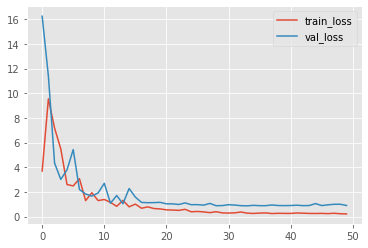

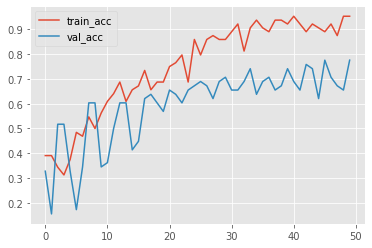

In [28]:
# Plot the loss
plt.plot(r.history['loss'],label = 'train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()


In [29]:
# save the model

model.save('model_resnet50.h5')

C:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [30]:
y_pred = model.predict(test_set)
y_pred

array([[6.02012360e-03, 9.65637386e-01, 2.83423997e-02],
       [1.34554394e-02, 9.72600579e-01, 1.39439544e-02],
       [2.00089410e-01, 1.60382092e-01, 6.39528453e-01],
       [8.44887570e-02, 8.95967066e-01, 1.95441581e-02],
       [8.70254189e-02, 8.30235302e-01, 8.27393308e-02],
       [2.93033458e-02, 8.52138281e-01, 1.18558310e-01],
       [4.96377743e-06, 2.34786421e-03, 9.97647226e-01],
       [7.99075902e-01, 1.97282836e-01, 3.64125124e-03],
       [1.39930537e-02, 9.51465964e-01, 3.45409997e-02],
       [4.47904468e-02, 3.40929955e-01, 6.14279687e-01],
       [6.58263266e-03, 4.15649146e-01, 5.77768266e-01],
       [6.00823574e-02, 8.05715144e-01, 1.34202570e-01],
       [7.88388774e-02, 5.02756424e-03, 9.16133523e-01],
       [4.27765667e-01, 3.97479773e-01, 1.74754560e-01],
       [1.36444326e-02, 9.43660557e-01, 4.26950492e-02],
       [3.47899497e-02, 5.65844059e-01, 3.99366021e-01],
       [2.32705395e-04, 9.96296704e-01, 3.47069139e-03],
       [2.64382511e-01, 5.76927

In [31]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1], dtype=int64)

In [33]:
img = image.load_img(r'C:\Users\Asus\Desktop\ML (self work)\Deep Learning\Projects\Car Brand Detection\Datasets\Test\lamborghini\23.jpg',target_size=(224,224))

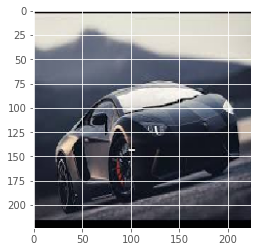

In [34]:
plt.imshow(img)

In [36]:
x = image.img_to_array(img)

In [38]:
x.shape

(224, 224, 3)

In [39]:
x = x/255

In [40]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [41]:
model.predict(img_data)

array([[0.01431943, 0.00129608, 0.98438454]], dtype=float32)

In [42]:
a = np.argmax(model.predict(img_data),axis=1)
a

array([2], dtype=int64)